# Dodged Brackets

In [1]:
import pandas as pd
from scipy.stats import mannwhitneyu

from lets_plot import *


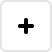
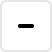
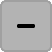
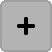
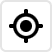
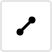
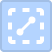
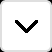
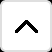
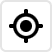
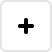
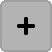
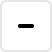
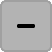
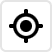
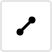
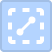
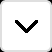
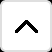
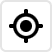

In [2]:
LetsPlot.setup_html()

In [3]:
def get_p_value(df, cat_col, val_col, g1, g2):
    x = df.loc[df[cat_col] == g1, val_col]
    y = df.loc[df[cat_col] == g2, val_col]
    return mannwhitneyu(x, y, alternative="two-sided").pvalue

def get_p_values_data(df, *, cat_col, val_col, base_dy, step):
    from itertools import combinations
    y_min, y_max = df[val_col].min(), df[val_col].max()
    categories = df[cat_col].unique().tolist()
    rows = []
    for i, (xmin, xmax) in enumerate(combinations(categories, 2)):
        y = base_dy + i * step
        p = get_p_value(df, cat_col, val_col, xmin, xmax)
        rows.append(dict(
            xmin=xmin, xmax=xmax, y=y,
            p=p
        ))
    return pd.DataFrame(rows)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
p = ggplot(df, aes("drv", "hwy", fill=as_discrete("year"))) + \
    geom_boxplot(alpha=.25) + \
    scale_fill_discrete(format="d")

## Problem

In [6]:
bracket_df1 = pd.concat([
    get_p_values_data(df[df["year"] == year], cat_col="drv", val_col="hwy", base_dy=47, step=6).assign(year=year)
    for year in [1999, 2008]
])
bracket_df1

,xmin,xmax,y,p,year
0,f,4,47,1.555409e-15,1999
1,f,r,53,1.300635e-05,1999
2,4,r,59,1.364233e-01,1999
0,f,4,47,3.294931e-14,2008
1,f,r,53,1.352111e-06,2008
2,4,r,59,1.310383e-01,2008


In [7]:
p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="p", color=as_discrete("year")), data=bracket_df1, label_format=".2~g")

## Solution 1

Preparing the dataset can be done in another way.

In [8]:
bracket_df2 = pd.concat([
    get_p_values_data(df[df["year"] == year], cat_col="drv", val_col="hwy", base_dy=base_dy, step=8).assign(year=year)
    for (year, base_dy) in [(1999, 47), (2008, 51)]
])
bracket_df2

,xmin,xmax,y,p,year
0,f,4,47,1.555409e-15,1999
1,f,r,55,1.300635e-05,1999
2,4,r,63,1.364233e-01,1999
0,f,4,51,3.294931e-14,2008
1,f,r,59,1.352111e-06,2008
2,4,r,67,1.310383e-01,2008


In [9]:
p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="p", color=as_discrete("year")), data=bracket_df2, label_format=".2~g")

## Solution 2

Use `position_dodgev()`.

In [10]:
p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="p", color=as_discrete("year")), data=bracket_df1, label_format=".2~g",
                 position="dodgev")